In [6]:
# Milestone 3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load the cleaned dataset
df = pd.read_csv('./data/cleaned_movies.csv')

# Display the first few rows to understand the dataset
print(df.head())

   movie_id                  title                       genres  release_year  \
0    912649  Venom: The Last Dance          ['28', '878', '12']        2024.0   
1   1241982                Moana 2  ['16', '12', '10751', '35']        2024.0   
2   1035048              Elevation          ['28', '878', '53']        2024.0   
3    974453             Absolution           ['28', '80', '53']        2024.0   
4   1182387                  Armor           ['28', '80', '53']        2024.0   

   rating  popularity  28  878  12  16  ...  10770  14  36  18  27  10752  \
0  0.6700    1.000000   1    1   1   0  ...      0   0   0   0   0      0   
1  0.6891    0.243579   0    0   1   1  ...      0   0   0   0   0      0   
2  0.6482    0.202638   1    1   0   0  ...      0   0   0   0   0      0   
3  0.6088    0.138693   1    0   0   0  ...      0   0   0   0   0      0   
4  0.5500    0.118806   1    0   0   0  ...      0   0   0   0   0      0   

   10402  99  37  Unnamed: 25  
0      0   0   0  

In [8]:
# Step 1: Statistical Summary
print("\nStatistical summary:")
print(df.describe())


Statistical summary:
           movie_id  release_year       rating   popularity           28  \
count  1.898000e+03   1898.000000  1898.000000  1898.000000  1898.000000   
mean   4.827093e+05   2013.315068     0.668751     0.004806     0.378293   
std    4.407869e+05     13.558355     0.125024     0.025406     0.485089   
min    1.100000e+01   1938.000000     0.000000     0.000000     0.000000   
25%    2.757650e+04   2008.000000     0.620000     0.001147     0.000000   
50%    3.959130e+05   2018.000000     0.684200     0.001967     0.000000   
75%    9.009618e+05   2023.000000     0.740000     0.003723     1.000000   
max    1.395139e+06   2026.000000     1.000000     1.000000     1.000000   

               878           12           16        10751           35  ...  \
count  1898.000000  1898.000000  1898.000000  1898.000000  1898.000000  ...   
mean      0.160169     0.250790     0.147524     0.149104     0.276080  ...   
std       0.366859     0.433582     0.354721     0.35628

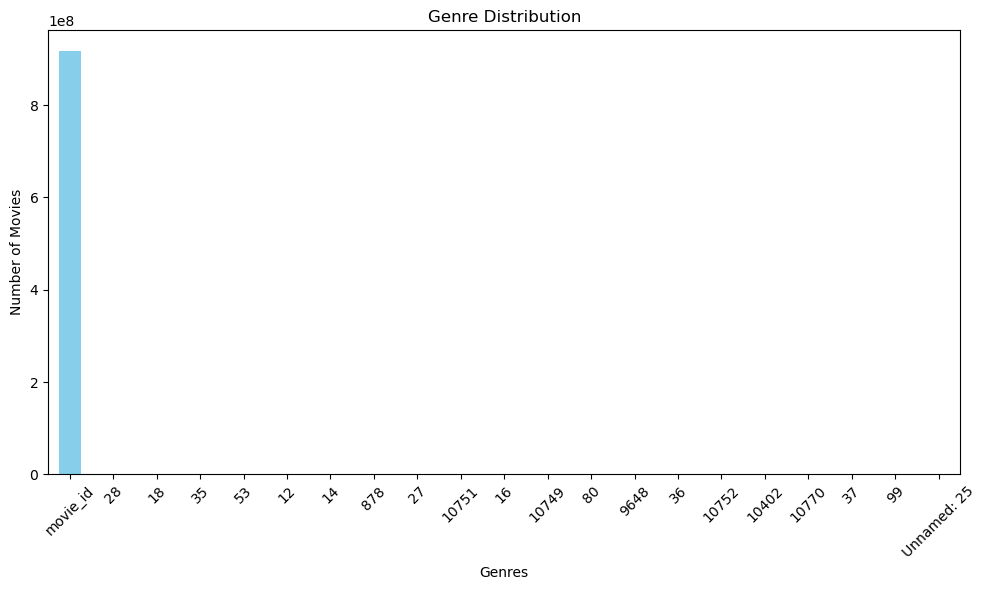

In [9]:
# Step 2: Genre Distribution
# Sum each genre column to calculate total movies in each genre
genre_columns = [col for col in df.columns if col not in ['title', 'release_year', 'rating', 'popularity', 'genres']]
genre_counts = df[genre_columns].sum().sort_values(ascending=False)

# Plot genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Genre Distribution')
plt.xlabel('Genres')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

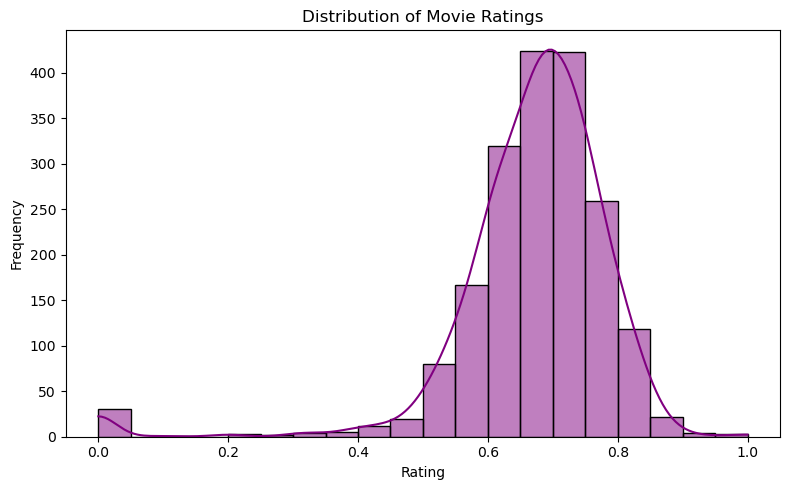

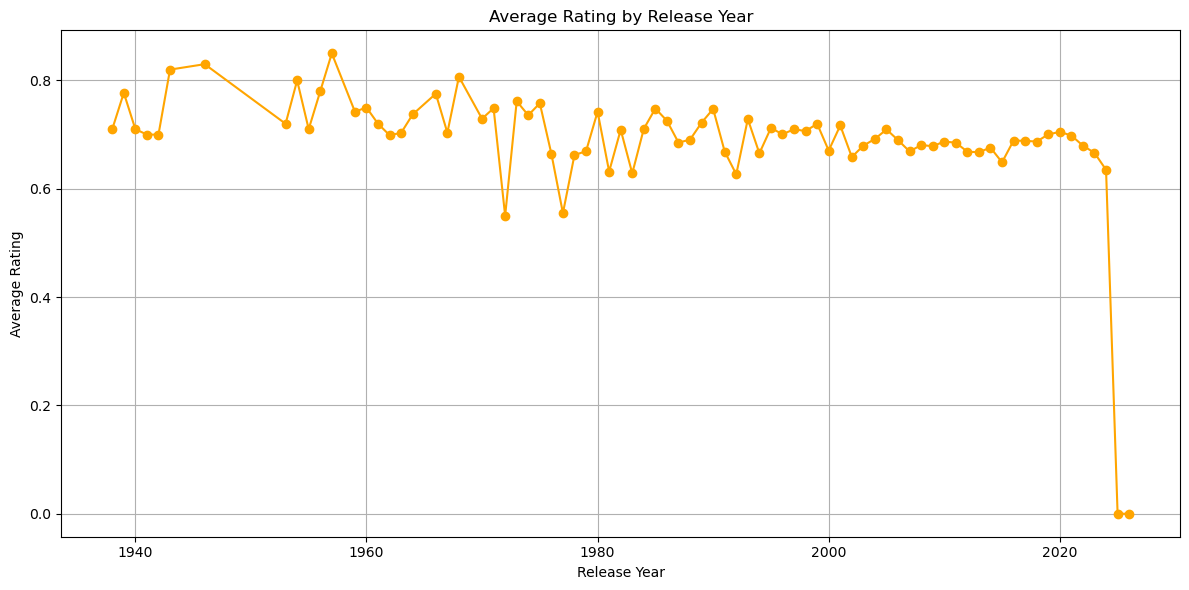

In [10]:
# Step 3: Rating Trends
# Distribution of ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True, color='purple')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Average rating by release year
avg_rating_by_year = df.groupby('release_year')['rating'].mean()

plt.figure(figsize=(12, 6))
avg_rating_by_year.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating by Release Year')
plt.xlabel('Release Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

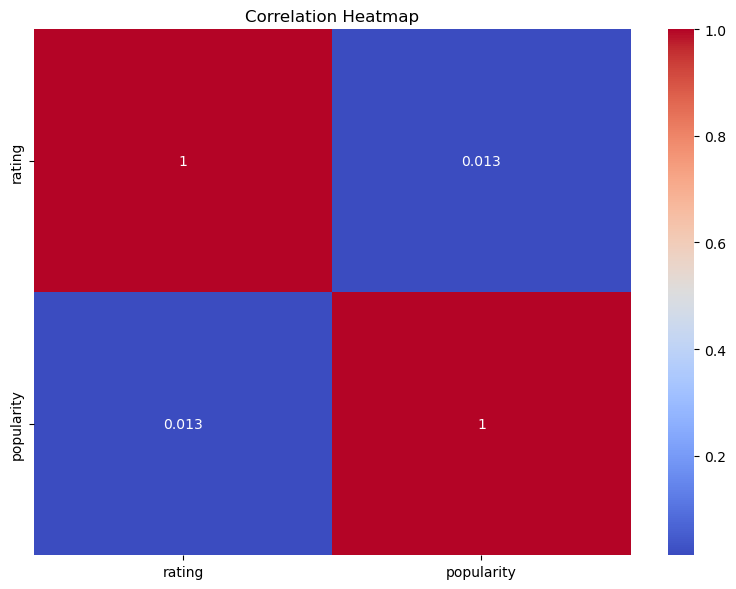

In [11]:
# Step 4: Correlation Analysis
# Heatmap for numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df[['rating', 'popularity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

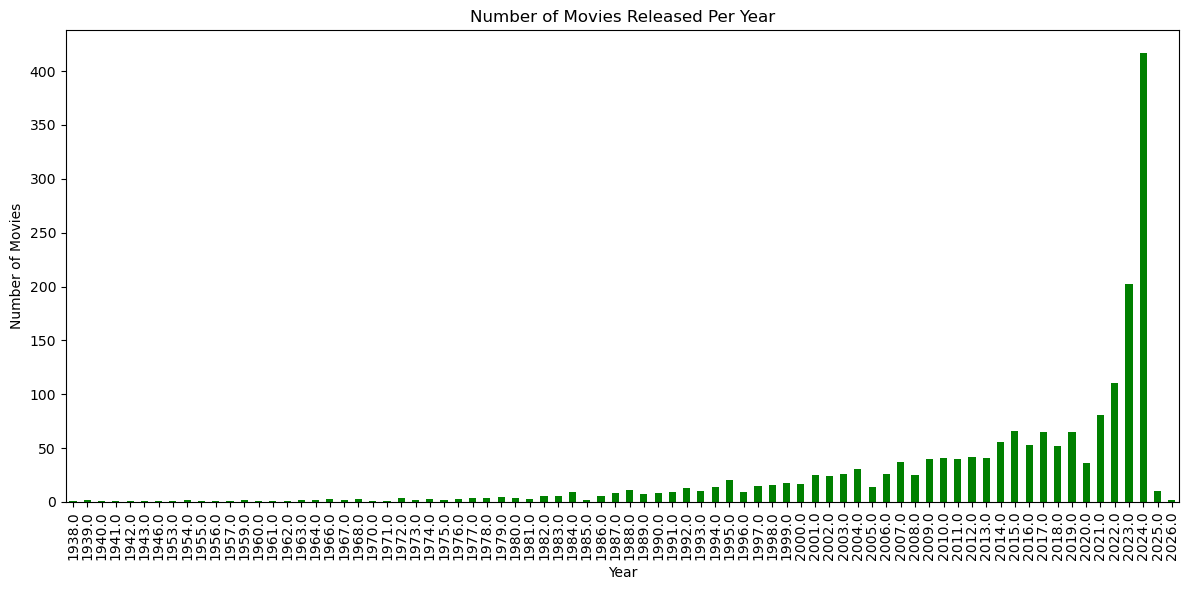

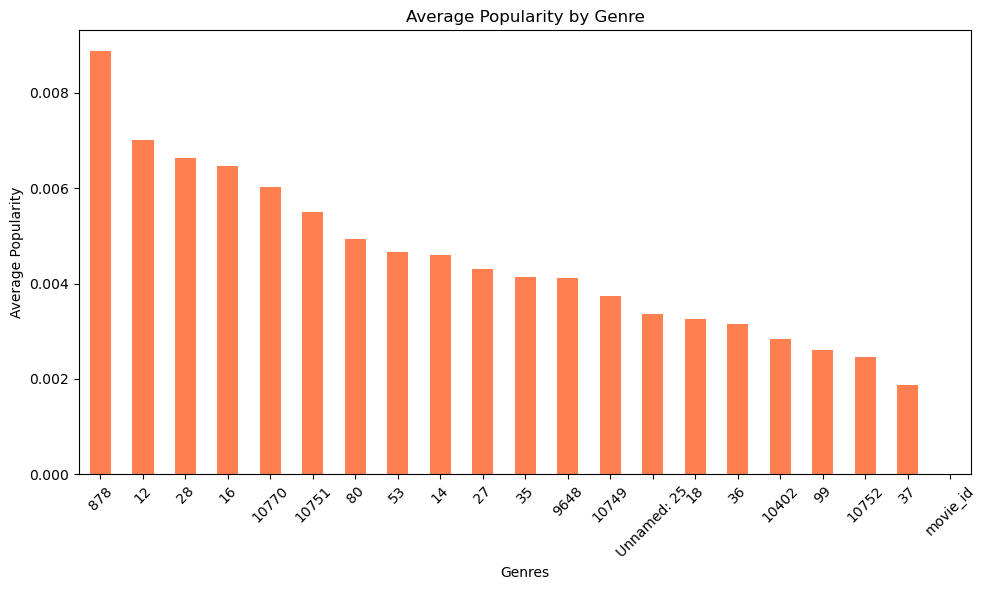

In [12]:
# Step 5: Movies Released Per Year
movies_per_year = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='green')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

# Additional Insight: Average Popularity by Genre
genre_popularity = {}
for genre in genre_columns:
    genre_popularity[genre] = df.loc[df[genre] == 1, 'popularity'].mean()

genre_popularity = pd.Series(genre_popularity).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_popularity.plot(kind='bar', color='coral')
plt.title('Average Popularity by Genre')
plt.xlabel('Genres')
plt.ylabel('Average Popularity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# Summarized Insights
print("\nSummarized Insights:")
print(f"Most popular genre: {genre_counts.idxmax()} ({genre_counts.max()} movies)")
print(f"Highest average rating: {df['rating'].max()}")
print(f"Year with most movie releases: {movies_per_year.idxmax()} ({movies_per_year.max()} movies)")


Summarized Insights:
Most popular genre: movie_id (916182174 movies)
Highest average rating: 1.0
Year with most movie releases: 2024.0 (417 movies)
